# The Battle of the Neighborhoods - Capstone Project - Pizza Mandate

## Introduction

#### The Problem
Given the ever increasing popularity of America's most cherished food - Pizza - Illinois has issued a mandate that, effective January 2025, every county must include at least 1 pizza restaurant per 5000 people.  The state of Illinois will be assisting the counties by providing $20,000 towards every additional pizzeria needing built.

The state now needs to understand which counties will need the most funds to support this initiative, and how much they should budget over the next five years.

#### The Solution
We will gather data on the current population and the number of pizza restaruants currently located in each county of Illinois.  Once we've collected this data, we will be able to identify the counties that are not currently in compliance and construct a 5 year plan to help them comply with this mandate.

## The Data

We will need to understand:
1. The counties in Illinois
2. The population of those counties
3. The number of pizza restaurants currently in those counties
4. How many additional restaurants will be needed in the next 5 years

Our data sources will be:
1. Counties & Population: https://en.wikipedia.org/wiki/List_of_counties_in_Illinois 
2. Pizza Restaurants: Foursquare API

## The Data Collection

#### County & Population Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_Illinois')
type(df)

list

In [3]:
len(df)

5

In [4]:
df[0].head()

,Counties of Illinois,Counties of Illinois.1
0,JD SN WI ↑BN MH LK CK WL DP KA KE DK LE OG CR ...,JD SN WI ↑BN MH LK CK WL DP KA KE DK LE OG CR ...
1,Location,State of Illinois
2,Number,102
3,Populations,"4,836 (Hardin) – 5,194,675 (Cook)"
4,Areas,"160 square miles (410 km2) (Putnam) – 1,184 sq..."


In [5]:
df[1].head()

,County,FIPS code[1],County seat[2],Est.[2],Origin,Etymology[3][4],Population[2],Area[2],Map
0,Adams County,1,Quincy,1825,Pike County,"John Quincy Adams (1767–1848), sixth President...",67103,"857 sq mi(2,220 km2)",NaN
1,Alexander County,3,Cairo,1819,Union County,"William M. Alexander, settler and state repres...",8238,236 sq mi(611 km2),NaN
2,Bond County,5,Greenville,1817,"Crawford County, Edwards County, and Madison C...","Shadrach Bond (1773–1832), first Governor of I...",17768,380 sq mi(984 km2),NaN
3,Boone County,7,Belvidere,1837,Winnebago County,"Daniel Boone (1734–1820), trailblazer of the W...",54165,281 sq mi(728 km2),NaN
4,Brown County,9,Mount Sterling,1839,Schuyler County,"Jacob Brown (1775–1828), successful War of 181...",6937,306 sq mi(793 km2),NaN


In [6]:
df_counties = df[1]
df_counties.head()

,County,FIPS code[1],County seat[2],Est.[2],Origin,Etymology[3][4],Population[2],Area[2],Map
0,Adams County,1,Quincy,1825,Pike County,"John Quincy Adams (1767–1848), sixth President...",67103,"857 sq mi(2,220 km2)",NaN
1,Alexander County,3,Cairo,1819,Union County,"William M. Alexander, settler and state repres...",8238,236 sq mi(611 km2),NaN
2,Bond County,5,Greenville,1817,"Crawford County, Edwards County, and Madison C...","Shadrach Bond (1773–1832), first Governor of I...",17768,380 sq mi(984 km2),NaN
3,Boone County,7,Belvidere,1837,Winnebago County,"Daniel Boone (1734–1820), trailblazer of the W...",54165,281 sq mi(728 km2),NaN
4,Brown County,9,Mount Sterling,1839,Schuyler County,"Jacob Brown (1775–1828), successful War of 181...",6937,306 sq mi(793 km2),NaN


In [7]:
df_co = df_counties[['County', 'Population[2]']]
df_co.head()

,County,Population[2]
0,Adams County,67103
1,Alexander County,8238
2,Bond County,17768
3,Boone County,54165
4,Brown County,6937


In [34]:
df_co.rename(columns={'Population[2]':'Population'}, inplace = True)
df_co.head()

,County,Population
0,Adams County,67103
1,Alexander County,8238
2,Bond County,17768
3,Boone County,54165
4,Brown County,6937


In [35]:
df_co.describe()

,Population
count,1.020000e+02
mean,1.257905e+05
std,5.272934e+05
min,4.320000e+03
25%,1.467850e+04
50%,2.731550e+04
75%,5.409200e+04
max,5.194675e+06


#### Latitude & Longitude Data

In [36]:
!pip install geopy
from geopy.geocoders import Nominatim

In [37]:
geolocator = Nominatim(user_agent="IL_LatLong")
location = geolocator.geocode("Brown County, IL")
print(location.address)
print((location.latitude, location.longitude))

Brown County, Illinois, United States of America
(39.9498214, -90.7485656)


In [38]:
!pip install geocoder
import geocoder

In [39]:
column_names = ["County", "Latitude", "Longitude"]
latlong_df = pd.DataFrame(columns = column_names)
latlong_df

,County,Latitude,Longitude


In [41]:
counties = df_co['County']
loc = []
lat = []
long = []
i = 0
for rows in counties:
    location = geolocator.geocode(df_co['County'][i] + ", IL")
    loc.append(df_co['County'][i])
    lat.append(location.latitude)
    long.append(location.longitude)
    i = i + 1

In [43]:
loclatlong = [loc, lat, long]

In [44]:
loclatlong

[['Adams County',
  'Alexander County',
  'Bond County',
  'Boone County',
  'Brown County',
  'Bureau County',
  'Calhoun County',
  'Carroll County',
  'Cass County',
  'Champaign County',
  'Christian County',
  'Clark County',
  'Clay County',
  'Clinton County',
  'Coles County',
  'Cook County',
  'Crawford County',
  'Cumberland County',
  'DeKalb County',
  'DeWitt County',
  'Douglas County',
  'DuPage County',
  'Edgar County',
  'Edwards County',
  'Effingham County',
  'Fayette County',
  'Ford County',
  'Franklin County',
  'Fulton County',
  'Gallatin County',
  'Greene County',
  'Grundy County',
  'Hamilton County',
  'Hancock County',
  'Hardin County',
  'Henderson County',
  'Henry County',
  'Iroquois County',
  'Jackson County',
  'Jasper County',
  'Jefferson County',
  'Jersey County',
  'Jo Daviess County',
  'Johnson County',
  'Kane County',
  'Kankakee County',
  'Kendall County',
  'Knox County',
  'Lake County',
  'LaSalle County',
  'Lawrence County',
  '

In [45]:
latlong_df['County'] = loc
latlong_df['Latitude'] = lat
latlong_df['Longitude'] = long

In [46]:
latlong_df.head()

,County,Latitude,Longitude
0,Adams County,39.978779,-91.211006
1,Alexander County,37.180153,-89.350283
2,Bond County,38.863033,-89.439142
3,Boone County,42.321246,-88.823551
4,Brown County,39.949821,-90.748566


In [47]:
latlong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
County       102 non-null object
Latitude     102 non-null float64
Longitude    102 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [48]:
df_coll = df_co
df_coll = df_coll.join(latlong_df.set_index('County'), on='County')
df_coll.head()

,County,Population,Latitude,Longitude
0,Adams County,67103,39.978779,-91.211006
1,Alexander County,8238,37.180153,-89.350283
2,Bond County,17768,38.863033,-89.439142
3,Boone County,54165,42.321246,-88.823551
4,Brown County,6937,39.949821,-90.748566


#### Foursquare Data

In [49]:
CLIENT_ID = 'LB5FZYMLW3EKO3GDPLQICJPHT0PIM10TTYKM2CI15JANYHV0'
CLIENT_SECRET = '420ZCLLR3JDPD1DMUTGW0NSCSXRLY53BVEKAGMOXTIHXD0SG'
VERSION = '20180605'
ACCESS_TOKEN = 'AUIVBHZLCFHI1JJ0FTHVF24F1QR2MLTHKAFOT5SM1LADDINK'
import requests

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=37500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
illinois_venues = getNearbyVenues(names=df_coll['County'],
                                   latitudes=df_coll['Latitude'],
                                   longitudes=df_coll['Longitude']
                                  )

Adams County
Alexander County
Bond County
Boone County
Brown County
Bureau County
Calhoun County
Carroll County
Cass County
Champaign County
Christian County
Clark County
Clay County
Clinton County
Coles County
Cook County
Crawford County
Cumberland County
DeKalb County
DeWitt County
Douglas County
DuPage County
Edgar County
Edwards County
Effingham County
Fayette County
Ford County
Franklin County
Fulton County
Gallatin County
Greene County
Grundy County
Hamilton County
Hancock County
Hardin County
Henderson County
Henry County
Iroquois County
Jackson County
Jasper County
Jefferson County
Jersey County
Jo Daviess County
Johnson County
Kane County
Kankakee County
Kendall County
Knox County
Lake County
LaSalle County
Lawrence County
Lee County
Livingston County
Logan County
Macon County
Macoupin County
Madison County
Marion County
Marshall County
Mason County
Massac County
McDonough County
McHenry County
McLean County
Menard County
Mercer County
Monroe County
Montgomery County
Morgan Co

In [52]:
illinois_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams County,39.978779,-91.211006,Texas Roadhouse,39.934074,-91.334174,Steakhouse
1,Adams County,39.978779,-91.211006,Kelly's Tavern,39.935085,-91.369169,American Restaurant
2,Adams County,39.978779,-91.211006,Tower Pizzeria and Mexican,39.935695,-91.372300,Pizza Place
3,Adams County,39.978779,-91.211006,Fatback's Smokin' Racks,39.942030,-91.377860,BBQ Joint
4,Adams County,39.978779,-91.211006,Panera Bread,39.934659,-91.355323,Bakery


In [53]:
# one hot encoding
illinois_onehot = pd.get_dummies(illinois_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
illinois_onehot['Neighborhood'] = illinois_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [illinois_onehot.columns[-1]] + list(illinois_onehot.columns[:-1])
illinois_onehot = illinois_onehot[fixed_columns]

illinois_onehot.set_index('Neighborhood', inplace=True)
illinois_onehot.head()

,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Adams County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adams County,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adams County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adams County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adams County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
illinois_grouped = illinois_onehot.groupby('Neighborhood').sum().reset_index()
illinois_grouped.rename(columns={'Neighborhood':'County'}, inplace = True)
print(illinois_grouped.shape)
illinois_grouped.head()

(102, 289)


,County,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,American Restaurant,Amphitheater,Animal Shelter,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Adams County,0,0,0,0,1,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alexander County,0,0,0,0,0,0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Bond County,0,0,0,0,0,0,11,0,0,...,0,0,0,1,0,2,0,0,0,0
3,Boone County,0,0,0,0,0,0,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Brown County,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
illinois_grouped.columns

Index(['County', 'ATM', 'Accessories Store', 'Adult Boutique',
       'African Restaurant', 'Airport', 'Airport Service',
       'American Restaurant', 'Amphitheater', 'Animal Shelter',
       ...
       'Waterfront', 'Well', 'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Winery',
       'Wings Joint', 'Women's Store', 'Yoga Studio', 'Zoo'],
      dtype='object', length=289)

In [56]:
illinois_grouped.set_index('County', inplace=True)
illinois_grouped

,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
County,,,,,,,,,,,,,,,,,,,,,
Adams County,0,0,0,0,1,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander County,0,0,0,0,0,0,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Bond County,0,0,0,0,0,0,11,0,0,0,...,0,0,0,1,0,2,0,0,0,0
Boone County,0,0,0,0,0,0,7,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Brown County,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whiteside County,3,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Will County,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Williamson County,0,0,0,0,0,0,4,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [57]:
il_pizza = illinois_grouped[['Pizza Place']]
il_pizza = il_pizza.reset_index()
il_pizza

,County,Pizza Place
0,Adams County,7
1,Alexander County,5
2,Bond County,16
3,Boone County,5
4,Brown County,4
...,...,...
97,Whiteside County,10
98,Will County,1
99,Williamson County,3
100,Winnebago County,4


In [58]:
df_collwp = df_coll
df_collwp = df_collwp.join(il_pizza.set_index('County'), on='County')
df_collwp.head()

,County,Population,Latitude,Longitude,Pizza Place
0,Adams County,67103,39.978779,-91.211006,7
1,Alexander County,8238,37.180153,-89.350283,5
2,Bond County,17768,38.863033,-89.439142,16
3,Boone County,54165,42.321246,-88.823551,5
4,Brown County,6937,39.949821,-90.748566,4


In [59]:
df_collwp.rename(columns={'Pizza Place':'Current Pizza'}, inplace = True)
df_collwp.head()

,County,Population,Latitude,Longitude,Current Pizza
0,Adams County,67103,39.978779,-91.211006,7
1,Alexander County,8238,37.180153,-89.350283,5
2,Bond County,17768,38.863033,-89.439142,16
3,Boone County,54165,42.321246,-88.823551,5
4,Brown County,6937,39.949821,-90.748566,4


In [60]:
import numpy as np
df_collwp['Required Pizza'] = np.ceil(df_collwp['Population']/5000)
df_collwp.head()

,County,Population,Latitude,Longitude,Current Pizza,Required Pizza
0,Adams County,67103,39.978779,-91.211006,7,14.0
1,Alexander County,8238,37.180153,-89.350283,5,2.0
2,Bond County,17768,38.863033,-89.439142,16,4.0
3,Boone County,54165,42.321246,-88.823551,5,11.0
4,Brown County,6937,39.949821,-90.748566,4,2.0


In [61]:
df_collwp['Remaining Pizza'] = df_collwp['Required Pizza']-df_collwp['Current Pizza']
df_collwp.head()

,County,Population,Latitude,Longitude,Current Pizza,Required Pizza,Remaining Pizza
0,Adams County,67103,39.978779,-91.211006,7,14.0,7.0
1,Alexander County,8238,37.180153,-89.350283,5,2.0,-3.0
2,Bond County,17768,38.863033,-89.439142,16,4.0,-12.0
3,Boone County,54165,42.321246,-88.823551,5,11.0,6.0
4,Brown County,6937,39.949821,-90.748566,4,2.0,-2.0


In [62]:
df_collwp['Percent to Target'] = df_collwp['Current Pizza']/df_collwp['Required Pizza']
df_collwp.head()

,County,Population,Latitude,Longitude,Current Pizza,Required Pizza,Remaining Pizza,Percent to Target
0,Adams County,67103,39.978779,-91.211006,7,14.0,7.0,0.500000
1,Alexander County,8238,37.180153,-89.350283,5,2.0,-3.0,2.500000
2,Bond County,17768,38.863033,-89.439142,16,4.0,-12.0,4.000000
3,Boone County,54165,42.321246,-88.823551,5,11.0,6.0,0.454545
4,Brown County,6937,39.949821,-90.748566,4,2.0,-2.0,2.000000


## The Analysis

In [63]:
df_collwp.describe()

,Population,Latitude,Longitude,Current Pizza,Required Pizza,Remaining Pizza,Percent to Target
count,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.257905e+05,39.478262,-89.550914,7.509804,25.637255,18.127451,1.698425
std,5.272934e+05,2.385414,1.880043,3.972044,105.426788,106.138586,1.599031
min,4.320000e+03,29.838164,-97.971597,0.000000,1.000000,-18.000000,0.000000
25%,1.467850e+04,38.604149,-90.077228,4.250000,3.000000,-5.000000,0.435065
50%,2.731550e+04,39.804181,-89.275310,7.000000,5.500000,-1.000000,1.112500
75%,5.409200e+04,41.004563,-88.426611,10.000000,11.000000,5.750000,2.500000
max,5.194675e+06,42.350666,-87.719437,21.000000,1039.000000,1035.000000,7.000000


In [64]:
df_collwp.shape

(102, 8)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
!pip install folium
import folium

In [67]:
df_collwp.rename(columns={'Current Pizza':'Current_Pizza', 'Required Pizza':'Required_Pizza','Remaining Pizza':'Remaining_Pizza','Percent to Target':'Percent_to_Target'}, inplace = True)
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target
0,Adams County,67103,39.978779,-91.211006,7,14.0,7.0,0.500000
1,Alexander County,8238,37.180153,-89.350283,5,2.0,-3.0,2.500000
2,Bond County,17768,38.863033,-89.439142,16,4.0,-12.0,4.000000
3,Boone County,54165,42.321246,-88.823551,5,11.0,6.0,0.454545
4,Brown County,6937,39.949821,-90.748566,4,2.0,-2.0,2.000000


In [68]:
df_collwp.sort_values(by='Population', inplace=True, ascending=False)
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target
15,Cook County,5194675,41.819738,-87.756525,4,1039.0,1035.0,0.003850
21,DuPage County,916924,41.860374,-88.090687,2,184.0,182.0,0.010870
48,Lake County,703462,42.332703,-87.993955,8,141.0,133.0,0.056738
98,Will County,677560,41.419406,-87.999475,1,136.0,135.0,0.007353
44,Kane County,515269,41.923434,-88.424831,0,104.0,104.0,0.000000


##### Given the size of the population of Chicago, Cook County and other surrounding counties have been excluded them from this mandate

In [69]:
df_collwp = df_collwp[df_collwp.County != 'Cook County']
df_collwp = df_collwp[df_collwp.County != 'Lake County']
df_collwp = df_collwp[df_collwp.County != 'DuPage County']
df_collwp = df_collwp[df_collwp.County != 'Will County']
df_collwp = df_collwp[df_collwp.County != 'Kane County']
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target
62,McHenry County,308760,42.329439,-88.460571,9,62.0,53.0,0.145161
100,Winnebago County,295266,42.325528,-89.149657,4,60.0,56.0,0.066667
86,St. Clair County,270056,38.461697,-89.932435,6,55.0,49.0,0.109091
56,Madison County,269282,38.811063,-89.901711,7,54.0,47.0,0.129630
9,Champaign County,201081,40.134686,-88.197556,5,41.0,36.0,0.121951


In [70]:
df_collwp.describe()

,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49718.989691,39.354918,-89.628121,7.742268,10.422680,2.680412,1.785160
std,65448.084820,2.380876,1.895612,3.881791,13.121893,14.269392,1.592162
min,4320.000000,29.838164,-97.971597,1.000000,1.000000,-18.000000,0.050000
25%,14665.000000,38.461697,-90.174374,5.000000,3.000000,-6.000000,0.500000
50%,22678.000000,39.706226,-89.299846,7.000000,5.000000,-2.000000,1.363636
75%,50486.000000,40.815612,-88.530258,10.000000,11.000000,4.000000,2.666667
max,308760.000000,42.350666,-87.719437,21.000000,62.000000,56.000000,7.000000


##### We do not need to include any counties that already meet this mandate, so they will be removed from the dataset

In [71]:
df_collwp = df_collwp[df_collwp.Remaining_Pizza >= 0]
df_collwp.describe()

,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,86035.488889,39.301377,-90.108865,5.288889,17.688889,12.400000,0.498808
std,81562.576526,3.214768,2.510335,2.555050,16.369070,15.869353,0.299261
min,8457.000000,29.838164,-97.971597,1.000000,2.000000,0.000000,0.050000
25%,32612.000000,38.811063,-90.190335,3.000000,7.000000,2.000000,0.214286
50%,52919.000000,40.016667,-89.356385,5.000000,11.000000,4.000000,0.478261
75%,113924.000000,41.274736,-88.607240,7.000000,23.000000,18.000000,0.750000
max,308760.000000,42.350666,-87.729100,12.000000,62.000000,56.000000,1.000000


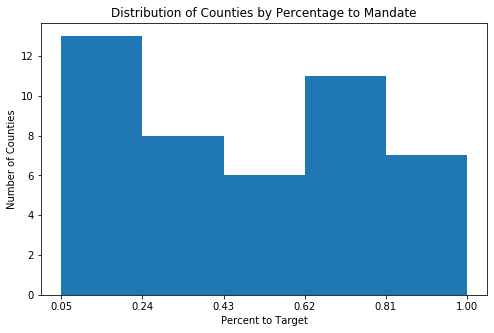

In [72]:
count, bin_edges = np.histogram(df_collwp['Percent_to_Target'], 5)
df_collwp['Percent_to_Target'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges, bins = 5)
plt.title('Distribution of Counties by Percentage to Mandate') # add a title to the histogram
plt.ylabel('Number of Counties') # add y-label
plt.xlabel('Percent to Target') # add x-label
plt.show()

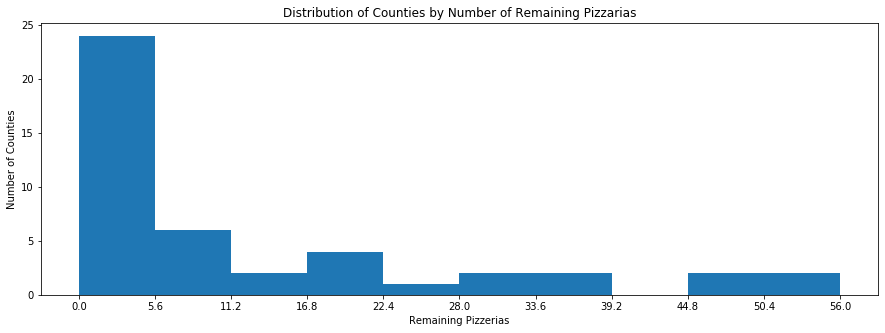

In [73]:
count, bin_edges = np.histogram(df_collwp['Remaining_Pizza'], 10)
df_collwp['Remaining_Pizza'].plot(kind='hist', figsize=(15, 5), xticks=bin_edges, bins = 10)
plt.title('Distribution of Counties by Number of Remaining Pizzarias')
plt.ylabel('Number of Counties')
plt.xlabel('Remaining Pizzerias')
plt.show()

In [74]:
!pip install xlrd

In [75]:
us_geo = r"C:\Users\jnettrouer\Desktop\IL.json"
print(us_geo)

C:\Users\jnettrouer\Desktop\IL.json


In [76]:
df_collwp['CountyName'] = df_collwp['County'].str.replace(' County','')
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target,CountyName
62,McHenry County,308760,42.329439,-88.460571,9,62.0,53.0,0.145161,McHenry
100,Winnebago County,295266,42.325528,-89.149657,4,60.0,56.0,0.066667,Winnebago
86,St. Clair County,270056,38.461697,-89.932435,6,55.0,49.0,0.109091,St. Clair
56,Madison County,269282,38.811063,-89.901711,7,54.0,47.0,0.129630,Madison
9,Champaign County,201081,40.134686,-88.197556,5,41.0,36.0,0.121951,Champaign


In [77]:
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

threshold_scale = np.linspace(df_collwp['Remaining_Pizza'].min(),
                              df_collwp['Remaining_Pizza'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[40.63,-89.40], zoom_start=6, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=us_geo,
    data=df_collwp,
    columns=['CountyName', 'Remaining_Pizza'],
    key_on='feature.properties.NAME',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Remaining Pizzerias',
    reset=True
)
world_map

C:\Users\jnettrouer\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [78]:
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target,CountyName
62,McHenry County,308760,42.329439,-88.460571,9,62.0,53.0,0.145161,McHenry
100,Winnebago County,295266,42.325528,-89.149657,4,60.0,56.0,0.066667,Winnebago
86,St. Clair County,270056,38.461697,-89.932435,6,55.0,49.0,0.109091,St. Clair
56,Madison County,269282,38.811063,-89.901711,7,54.0,47.0,0.129630,Madison
9,Champaign County,201081,40.134686,-88.197556,5,41.0,36.0,0.121951,Champaign


In [80]:
df_collwp['Additions_Per_Year'] = df_collwp['Remaining_Pizza']/5
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target,CountyName,Additions_Per_Year
62,McHenry County,308760,42.329439,-88.460571,9,62.0,53.0,0.145161,McHenry,10.6
100,Winnebago County,295266,42.325528,-89.149657,4,60.0,56.0,0.066667,Winnebago,11.2
86,St. Clair County,270056,38.461697,-89.932435,6,55.0,49.0,0.109091,St. Clair,9.8
56,Madison County,269282,38.811063,-89.901711,7,54.0,47.0,0.129630,Madison,9.4
9,Champaign County,201081,40.134686,-88.197556,5,41.0,36.0,0.121951,Champaign,7.2


In [81]:
df_collwp['Cost_Per_Year'] = df_collwp['Additions_Per_Year']*20000
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target,CountyName,Additions_Per_Year,Cost_Per_Year
62,McHenry County,308760,42.329439,-88.460571,9,62.0,53.0,0.145161,McHenry,10.6,212000.0
100,Winnebago County,295266,42.325528,-89.149657,4,60.0,56.0,0.066667,Winnebago,11.2,224000.0
86,St. Clair County,270056,38.461697,-89.932435,6,55.0,49.0,0.109091,St. Clair,9.8,196000.0
56,Madison County,269282,38.811063,-89.901711,7,54.0,47.0,0.129630,Madison,9.4,188000.0
9,Champaign County,201081,40.134686,-88.197556,5,41.0,36.0,0.121951,Champaign,7.2,144000.0


In [82]:
df_collwp['Total_Cost'] = df_collwp['Cost_Per_Year']*5
df_collwp.head()

,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target,CountyName,Additions_Per_Year,Cost_Per_Year,Total_Cost
62,McHenry County,308760,42.329439,-88.460571,9,62.0,53.0,0.145161,McHenry,10.6,212000.0,1060000.0
100,Winnebago County,295266,42.325528,-89.149657,4,60.0,56.0,0.066667,Winnebago,11.2,224000.0,1120000.0
86,St. Clair County,270056,38.461697,-89.932435,6,55.0,49.0,0.109091,St. Clair,9.8,196000.0,980000.0
56,Madison County,269282,38.811063,-89.901711,7,54.0,47.0,0.129630,Madison,9.4,188000.0,940000.0
9,Champaign County,201081,40.134686,-88.197556,5,41.0,36.0,0.121951,Champaign,7.2,144000.0,720000.0


In [94]:
df_collwp.describe()

,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target,Additions_Per_Year,Cost_Per_Year,Total_Cost
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,86035.488889,39.301377,-90.108865,5.288889,17.688889,12.400000,0.498808,2.480000,49600.000000,2.480000e+05
std,81562.576526,3.214768,2.510335,2.555050,16.369070,15.869353,0.299261,3.173871,63477.411874,3.173871e+05
min,8457.000000,29.838164,-97.971597,1.000000,2.000000,0.000000,0.050000,0.000000,0.000000,0.000000e+00
25%,32612.000000,38.811063,-90.190335,3.000000,7.000000,2.000000,0.214286,0.400000,8000.000000,4.000000e+04
50%,52919.000000,40.016667,-89.356385,5.000000,11.000000,4.000000,0.478261,0.800000,16000.000000,8.000000e+04
75%,113924.000000,41.274736,-88.607240,7.000000,23.000000,18.000000,0.750000,3.600000,72000.000000,3.600000e+05
max,308760.000000,42.350666,-87.729100,12.000000,62.000000,56.000000,1.000000,11.200000,224000.000000,1.120000e+06


In [97]:
df_collwp.sum()

County                Winnebago CountyMcHenry CountySt. Clair County...
Population                                                      3871597
Latitude                                                        1768.56
Longitude                                                       -4054.9
Current_Pizza                                                       238
Required_Pizza                                                      796
Remaining_Pizza                                                     558
Percent_to_Target                                               22.4463
CountyName            WinnebagoMcHenrySt. ClairMadisonSangamonChampa...
Additions_Per_Year                                                111.6
Cost_Per_Year                                                 2.232e+06
Total_Cost                                                    1.116e+07
dtype: object

Text(0.5, 1.0, 'Total Pizzeria Cost by County')

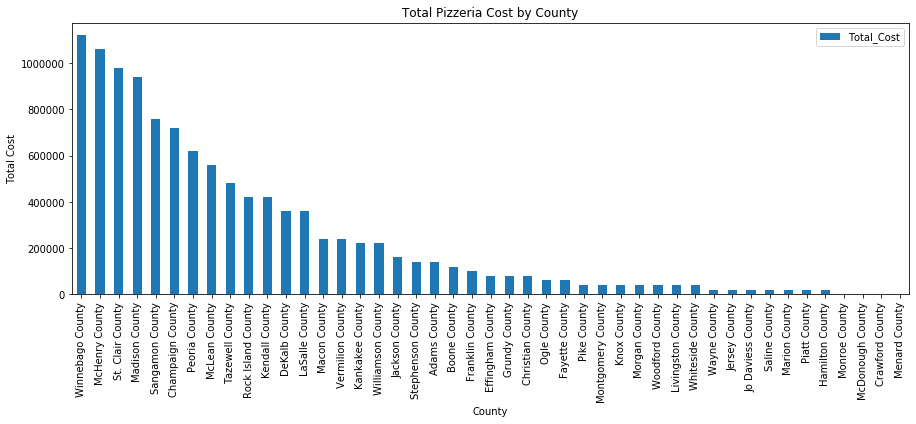

In [93]:
df_collwp.sort_values(by='Total_Cost', ascending=False, inplace=True)
df_collwp.plot(kind='bar', figsize=(15, 5), rot=90, x='County', y='Total_Cost') 
plt.xlabel('County')
plt.ylabel('Total Cost')
plt.title('Total Pizzeria Cost by County')

## Conclusion

In our analysis, we identified 97 counties in the state of Illinois that were affected by the mandate.  Of those, 52 counties were already in compliance leaving 45 counties that will need financial assitance by the state, for a total of 11.2 million dollars over the next 5 years - or $2.23 million per year.

Our reccommendation to the state is to immediately focus their attention on the following 7 counties, given they make up over 50% of the total cost.

In [101]:
print(df_collwp['Total_Cost'].head(7).sum())
df_collwp.head(7)

6200000.0


,County,Population,Latitude,Longitude,Current_Pizza,Required_Pizza,Remaining_Pizza,Percent_to_Target,CountyName,Additions_Per_Year,Cost_Per_Year,Total_Cost
100,Winnebago County,295266,42.325528,-89.149657,4,60.0,56.0,0.066667,Winnebago,11.2,224000.0,1120000.0
62,McHenry County,308760,42.329439,-88.460571,9,62.0,53.0,0.145161,McHenry,10.6,212000.0,1060000.0
86,St. Clair County,270056,38.461697,-89.932435,6,55.0,49.0,0.109091,St. Clair,9.8,196000.0,980000.0
56,Madison County,269282,38.811063,-89.901711,7,54.0,47.0,0.129630,Madison,9.4,188000.0,940000.0
82,Sangamon County,197465,39.762367,-89.645490,2,40.0,38.0,0.050000,Sangamon,7.6,152000.0,760000.0
9,Champaign County,201081,40.134686,-88.197556,5,41.0,36.0,0.121951,Champaign,7.2,144000.0,720000.0
71,Peoria County,186494,40.802128,-89.771376,7,38.0,31.0,0.184211,Peoria,6.2,124000.0,620000.0


## Next Steps

The best course of action from here would be to run some further analysis to determine the optimal location for the additional pizzerias within each individual county.  Additionally, if it hasn't been done already, some revenue/growth projections should be done to support the legitimacy of this mandate and determine if/when the state can expect a return on their investment.

We are more than happy to assist with both of these analyses, pending the State's approval.